# Data Pre-processing
Data pre-processing transform data into a special format that is useful or suitable for machine learning model<br><br> 
Why we need data pre-processing? <br><br>
We need data pre-processing due to the following reasons:
1. To improve machine learning models performance
2. To reduce the complexity of relationships in data
3. To make data compatible for machine learning algorithms
4. To make data format suitable for model interpretation
5. Model will fail to perfom well without pre-processing 

* <b> Tasks:</b>
* Handling missing values
* Normalizing or Standerdizing(Scaling) numerical features
* Encoding Categorical variables
* Removing Duplicates and Outliesrs
* Splitting datasets into training and testing sets

In [3]:
# Import Libraries
import pandas as pd    # Data manipulation
import numpy as np     # Numerical operations

import seaborn as sns   # Load sample datasets and visualization
import matplotlib.pyplot as plt   # Data visualization

from scipy import stats    # Statistical functions

from warnings import filterwarnings    # Warning control
filterwarnings('ignore')    # Ignore warnings for cleaner output

from sklearn.preprocessing import LabelEncoder  # Encoding categorical variables
from sklearn.preprocessing import StandardScaler  # Scaling numerical features

In [4]:
# Load the dataset from a CSV file
df = pd.read_csv('./dataset/titanic.csv')

In [5]:
# To se first 5 rows of the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Check the shape of the dataset
df.shape

(891, 12)

In [7]:
# Check data types
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
# check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Find and drop Duplicate values 

In [9]:
# Find duplicate values
df.duplicated().sum()

0

## Find and Handling missing values

In [10]:
# Find missing values
print("------------------------------------------------------")
print(f"Missing Values in each Column:\n{df.isnull().sum().sort_values(ascending=False)}")
# Find percentage of missing values
print("------------------------------------------------------")
print(f"Percentage of Missing Values in each column: \n {round(df.isnull().sum() / len(df) * 100, 2).sort_values(ascending=False)}")

------------------------------------------------------
Missing Values in each Column:
Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64
------------------------------------------------------
Percentage of Missing Values in each column: 
 Cabin          77.10
Age            19.87
Embarked        0.22
PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
dtype: float64


Now, we visualize missing values through a Heatmap

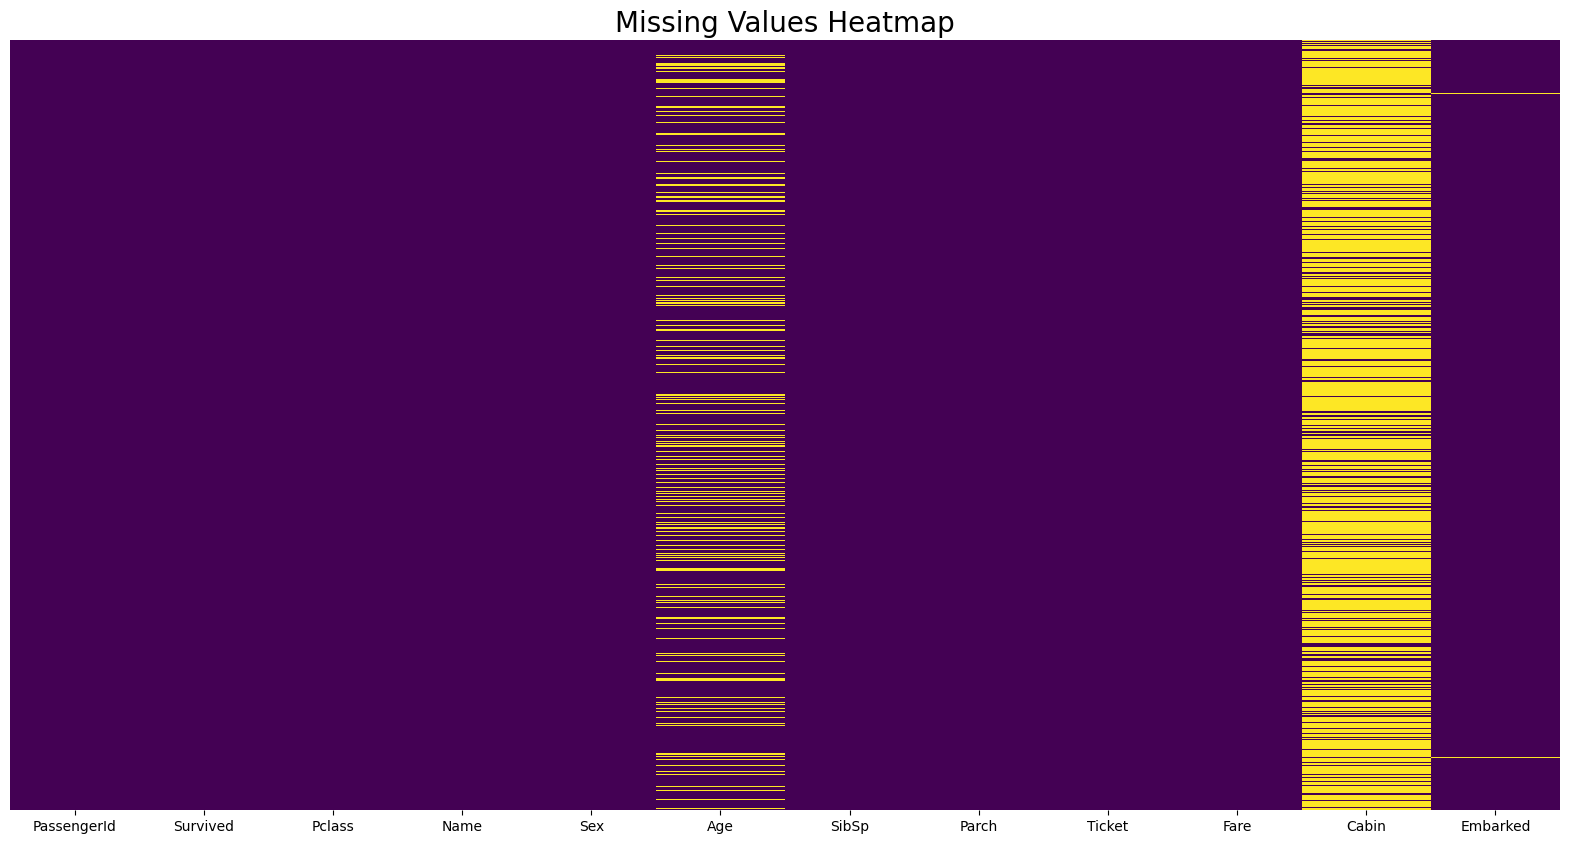

In [11]:
# Visualize missing values through a Heatmap
plt.figure(figsize=(20,10))

sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap', fontsize=20)
plt.show()

### Methods of Handling Missing Values
1. Collect data from where it is missing
2. Mean, Median, Mode
3. Forward or Backward Fill
4. Deep Learning Techniques (Iterative Imputers)
5. KNN Imputers (by using Neighboring Algorithm)
6. Delete Missing Values


### Method No:1 
As it is not possible to collect data again from Titanic So, we ignore this method
### Method No:2
Mean, Median, Mode 

In [12]:
round(df['Age'].mean(), 2)  # Mean stretches the values due to outliers

29.7

In [13]:
df['Age'].median()   # Median is better in this case because it is not affected by outliers

28.0

In [14]:
# Fill age column with median 
df['Age'] = df['Age'].fillna(df['Age'].median())

In [15]:
# Remove 'Cabin' column due to high number of missing values as it is not useful for analysis
df.drop('Cabin', axis=1, inplace=True)   # axis=1 means column, axis=0 means row

In [16]:
# First we check value counts of 'Embarked' column
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [17]:
# Replacing 'Embarked' column missing values with mode[0] because it is categorical data having only 3 unique values with one mode
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [18]:
# Replace Embarked missing values with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [19]:
# Check missing values again after imputation
df.isnull().sum().sort_values(ascending=False)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Method No:3 
#### Imputation using Backward and Forward Fill

In [20]:
# Load the dataset to see imputation using forward fill and backward fill
df = pd.read_csv('./dataset/titanic.csv')

In [21]:
df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [ ]:
# Impute missing value of Age column using forward fill method
df['Age'] = df['Age'].ffill()  # Forward fill

In [ ]:
# Impute missing value of Age column using backward fill method
df['Age'] = df['Age'].bfill()  # Backward fill

In [ ]:
# Check missing values after applying forward fill and backward fill methods one by one
df.isnull().sum().sort_values(ascending=False)

### Method No:4 
#### Iterative Imputers (Impute Missing Values using SK-Learn)


#### 1. </b>Univariate Imputation</b>
Univariate imputation refers to the process of filling in missing values in a single variable (feature) without considering the relationships or values of other variables. Here are some key points:

<b> Focus on One Variable:</b> In univariate imputation, only the variable with missing values is examined, and the imputation method is applied solely to that variable.

<b>Common Methods:</b>

<b>Mean Imputation:</b> Replacing missing values with the mean of the observed values.\
<b>Median Imputation:</b> Using the median instead of the mean, which is more robust to outliers.\
<b>Mode Imputation:</b> For categorical variables, replacing missing values with the most frequent category.\
<b>Constant Imputation:</b> Filling missing values with a specific constant (like zero or a placeholder).\
<b>Simplicity:</b> Univariate imputation is straightforward and easy to implement but may not capture the underlying data structure or relationships in multivariate datasets.

<b>Limitations:</b> Since it ignores other variables, it can lead to biased results if there are correlations between the variable with missing values and other features in the dataset.

In [22]:
# Import Simple Imputer from sklearn 
from sklearn.impute import SimpleImputer

In [23]:
# Load the dataset again to show imputation using sklearn
df = pd.read_csv('./dataset/titanic.csv')

In [24]:
# Check values before imputation
df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [25]:
# Impute Age column using Sklearn (by simple imputer)
imputer = SimpleImputer(strategy='median')   # Create an imputer object with a median filling strategy
df['Age'] = imputer.fit_transform(df[['Age']])   # Fit the imputer on Age column and transform the data

In [26]:
# Check values fter imputation
df.isnull().sum().sort_values(ascending=False)

Cabin          687
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

### 2. Multivariate Imputation 
This is a method for filling in missing data by using information from multiple variables in a dataset. It leverages the relationships and correlations between features to predict missing values, often employing statistical models or machine learning techniques. This approach aims to provide more accurate and contextually relevant imputations compared to univariate methods, which only consider a single variable.

<b>Common Techniques</b>

<b>Multiple Imputation:</b> Creates several complete datasets by imputing missing values multiple times, allowing for variability and uncertainty in estimates.\
<b>K-Nearest Neighbors (KNN):</b> Uses the nearest neighbors in the dataset to impute missing values based on similarities.\
<b>Multivariate Normal Imputation:</b> Assumes that the data follows a multivariate normal distribution to impute missing values.

<b>Benefits</b>
<b>Improved Accuracy:</b> By using the information from related features, multivariate imputation can lead to more accurate estimates of missing values.\
<b>Reduced Bias:</b> It helps mitigate biases that might arise from simply filling in values without considering other data.

<b>Considerations</b>
<b>Complexity:</b> It can be more computationally intensive and complex to implement compared to simpler methods.
<b>Data Loss:</b> Depending on the method used, it may lead to row deletions if complete cases are required for the imputation.

In [27]:
# Load the dataset again to show Multivariate imputation
df = pd.read_csv('./dataset/titanic.csv') # we can load dataset through sns.load_dataset('titanic')

In [28]:
# check missing values before IterativeImputer
df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [29]:
from sklearn.experimental import enable_iterative_imputer  # To enable the experimental feature
from sklearn.impute import IterativeImputer  # Import Iterative Imputer

# Impute Age column using Multivariate Imputer
imputer = IterativeImputer(max_iter=20, n_nearest_features=5)  # Create an imputer object
df['Age'] = imputer.fit_transform(df[['Age']])  # Fit the imputer on Age column and transform the data

In [30]:
# Check missing values after Multivariate Imputer
df.isnull().sum().sort_values(ascending=False)

Cabin          687
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [32]:
# Let's check , either Cabin column is dropped or not
df.isnull().sum().sort_values(ascending=False)

Cabin          687
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

### Method No:5
#### Using KNN Imputer

In [33]:
#import dataset again to show KNN Imputer
df = pd.read_csv('./dataset/titanic.csv')

In [34]:
# Check missing values before KNN Imputer
df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [35]:
# Import KNN Imputer from sklearn
from sklearn.impute import KNNImputer

# Impute Age column using KNN Imputer
imputer = KNNImputer(n_neighbors=5)  # Create KNN imputer object with 5 nearest neighbors
df['Age'] = imputer.fit_transform(df[['Age']])

In [36]:
# Check missing values again after KNN Imputer
df.isnull().sum().sort_values(ascending=False)

Cabin          687
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

### Method No:6
#### Delete Missing Rows (data)

In [47]:
# Load the dataset again to show deletion of missing values
df = pd.read_csv('./dataset/titanic.csv')

In [48]:
# Check missing values before deletion of missing values
df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [49]:
# Drop rows with missing values
df.dropna(inplace=True)

In [50]:
# Check missing values again after dropping rows with missing values
df.isnull().sum().sort_values(ascending=False)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
# Check the info of the dataset after dropping rows with missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


Drop command has dropped the majority of missing data rows and our data has now 183 Rows/entries instead of 889, but this method is not right. Be careful about the deleting of missing values. 

#### Important Note:
Imputation through Multivariate is best way to impute missing values. But keep in mind it is `experimental` by SKlearn.
Use different other methods mentioned in this notebook. 

---

### Step-5: Encoding Categorical Variables

In [37]:
# Let's check the dataset to see categorical variables for encoding
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We Encode two columns, `Sex` and `Embarked` by LabelEncoder

In [38]:
# Encode categorical variables
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [39]:
# Display the encoded columns
encoded_columns = df[['Sex', 'Embarked']]
print(encoded_columns.head())

   Sex  Embarked
0    1         2
1    0         0
2    0         2
3    0         2
4    1         2


In [40]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


### Step-6: Checking Outliers

### Step-7 Scaling and Standardization
We check the distribution of our data through visualization, We check this by visualizing simple `Histplot`

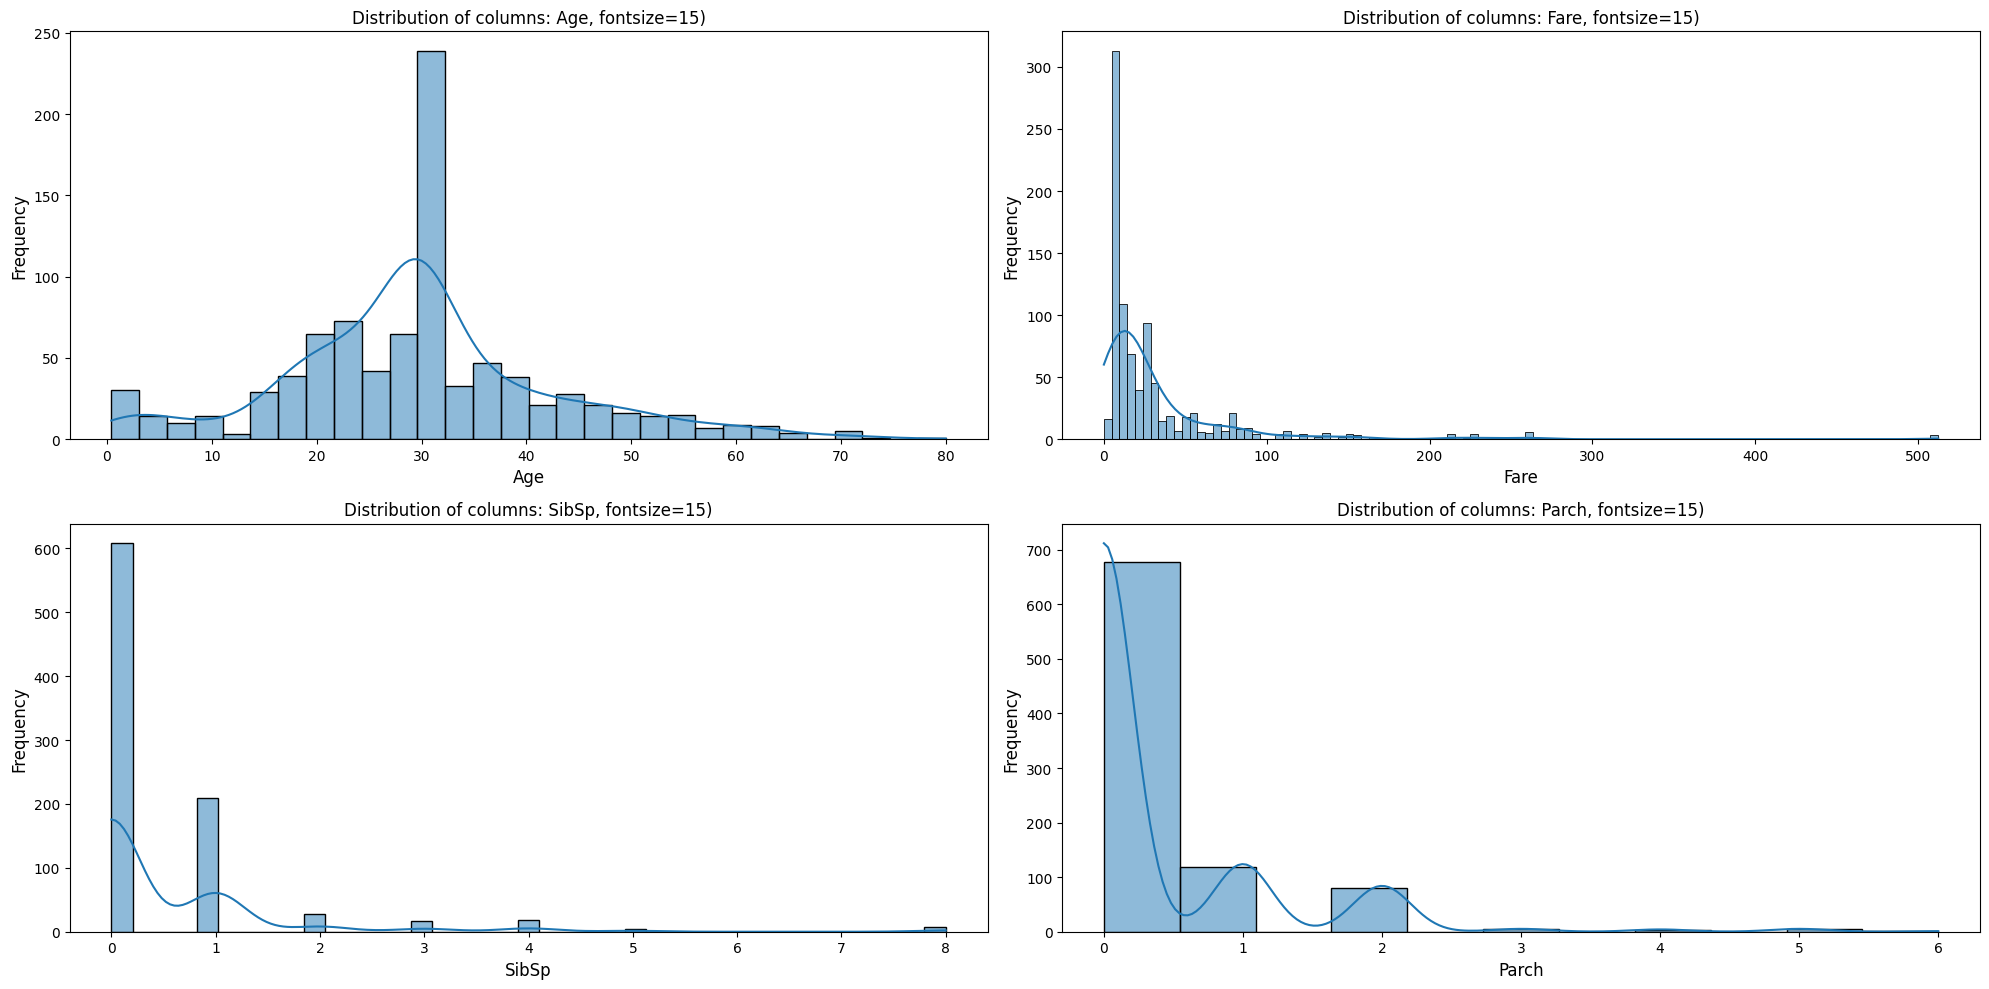

In [41]:
# Plot histogram for numerical columns
numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']
plt.figure(figsize=(20,10))

for i, col in enumerate(numerical_cols):
    plt.subplot(2,2,i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of columns: {col}, fontsize=15)')
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.tight_layout()
plt.show()

The distribution plots indicate that the numerical columns are not normally distributed. Therefore, we need to scale and potentially transform these numerical columns to better meet the assumptions of certain algorithms, such as linear regression or logistic regression, which may perform better with normally distributed data.



<b>`Scaling:`</b> Standardization (Z-score scaling) will center the data around the mean and scale it to unit variance but does not guarantee normality.



In [42]:
scalar = StandardScaler()
df[numerical_cols] = scalar.fit_transform(df[numerical_cols])

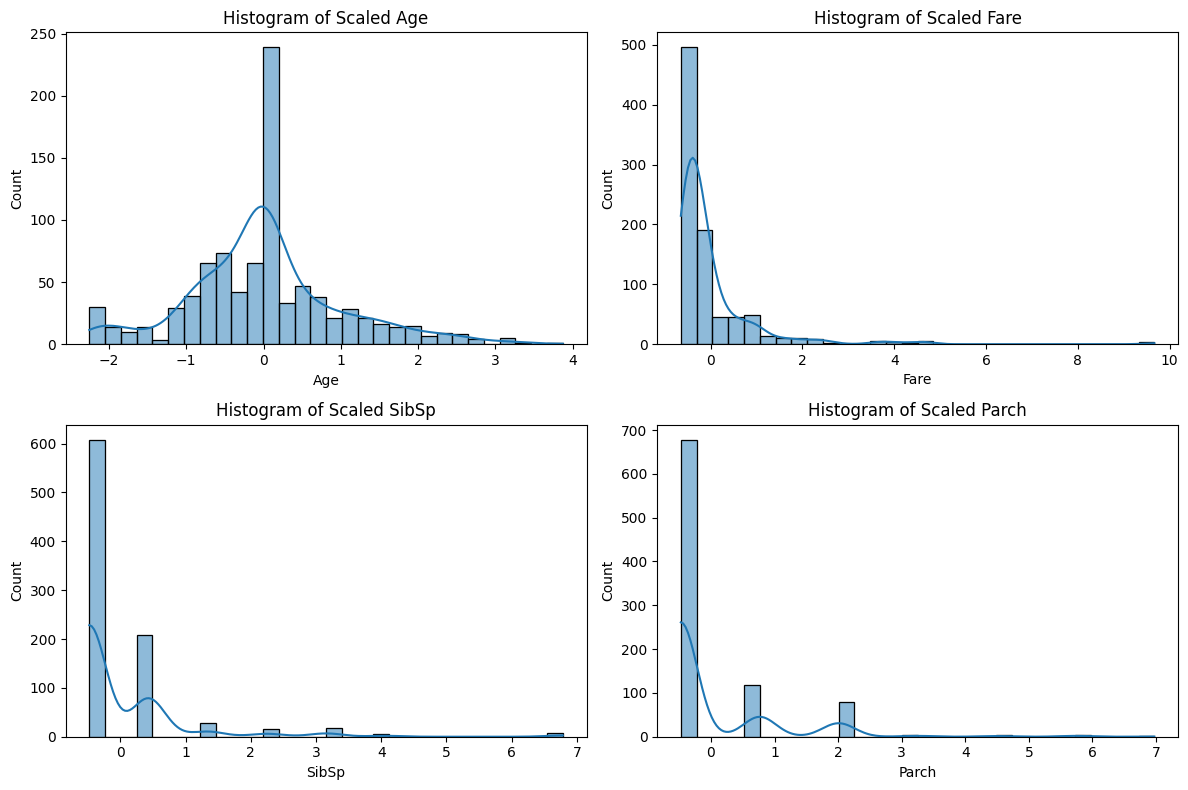

In [43]:
# Plot histograms for scaled numerical columns
plt.figure(figsize=(12, 8))
scaled_columns = ['Age', 'Fare', 'SibSp', 'Parch']

for i, column in enumerate(scaled_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[column], bins=30, kde=True)  # Add KDE for smoother curve
    plt.title(f'Histogram of Scaled {column}')
plt.tight_layout()
plt.show()

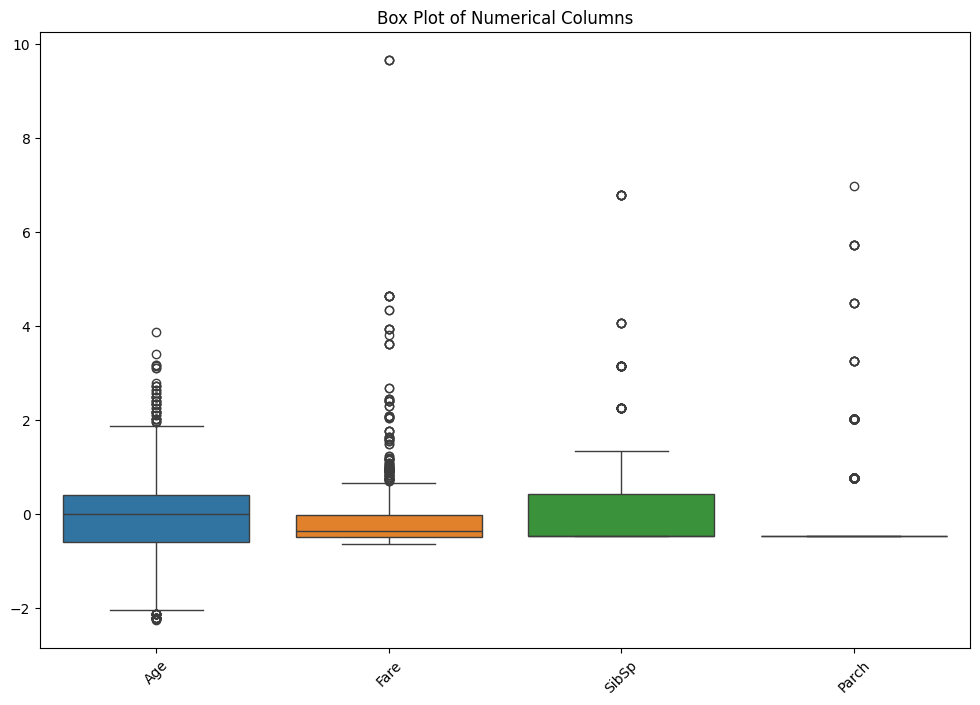

In [44]:
# Define the numerical columns
numerical_columns = ['Age', 'Fare', 'SibSp', 'Parch']

# Create a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_columns])
plt.title('Box Plot of Numerical Columns')
plt.xticks(rotation=45)
plt.show()

In [45]:
# Calculate IQR for each numerical column
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR)))
print(outliers.sum())

Age       66
Fare     116
SibSp     46
Parch    213
dtype: int64


## Outputs:
1. There are 891 rows and 12 columns in titanic dataset

2. The Titanic dataset contains:
    * 2 float type columns
    * 5 int type columns
    * 5 object type columns
3. There is zero or no duplicate value in the dataset
4. There are three columns having missing values like:
   1. Age: 177
   2. Cabin: 687
   3. Embarked: 2
5. As `Cabin` col having large amount of missing values, so we decided to remove it because this col is not important as it shows only the Cabin numbers, so it will not effect on remaining our dataset.
6. We imputed the `Embarked` col with mode as it is categorical col and impute `Age` col with median
7. We created a `Heatmap` before and after imputing missing values to see the visualization if the dataset
8. We encoded two categorical columns `Sex` and `Embarked` through LabelEncoder 